In [140]:
%load_ext autoreload
%autoreload 2

In [1]:
import os 
import math

import torch
import networkx as nx
import dgl
import matplotlib.pyplot as plt

In [62]:
from dgl.data.utils import load_graphs
graphs, _ = load_graphs('../preprocessing/debug.bin')
graphs = graphs[:1]
graph = graphs[0]

In [2]:
folder = '../data/dgl_graphs'
ratings = {'False': 0, 'True': 1}

dataset = [
    (load_graph(f'{folder}/{rating}/{filename}'), label) 
    for rating, label in ratings.items()
    for filename in os.listdir(f'{folder}/{rating}') 
    if filename.endswith('json')
]

graphs, labels = zip(*dataset)

In [31]:
def select_nodes_of_type(graph, node_type):
    return [
        node 
        for node in graph.nodes()
        if node in graph.nodes().data() and graph.nodes().data()[node]['type_'] == node_type
    ]

def view_graph(graph):
    nxg = graph.to_networkx(node_attrs=['type_'])
    pos = nx.kamada_kawai_layout(nxg)
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 0), pos=pos, node_size=10, node_color='#ff0000')
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 1), pos=pos, node_size=10, node_color='#00ff00')
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 2), pos=pos, node_size=10, node_color='#0000ff')
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 3), pos=pos, node_size=10, node_color='#00ffff')
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 4), pos=pos, node_size=10, node_color='#ff00ff')
    nx.draw_networkx_nodes(nxg, nodelist=select_nodes_of_type(nxg, 5), pos=pos, node_size=10, node_color='#ffff00')
    
    nx.draw_networkx_edges(nxg, edge_list=nxg.edges(), pos=pos, width=.1, arrowsize=5)
    
def display_graphs(graphs, max_cols):
    cols = min(max_cols, math.ceil(math.sqrt(len(graphs))))
    rows = math.ceil(len(graphs) / cols)
    
#     plt.figure(figsize=(16, 16))
    for index, graph in enumerate(graphs, start=1):
        plt.subplot(rows, cols, index)
        view_graph(graph)

In [63]:
import torch.nn.functional as F
type_ = F.one_hot(graph.ndata['type_'], num_classes=6)
device = F.one_hot(graph.ndata['device'], num_classes=7)
followers_count = graph.ndata['followers_count']
retweet_count = graph.ndata['retweet_count']

In [117]:
t = F.one_hot(graph.ndata['type_'], num_classes=6)[:2]
f = followers_count[:2]
r = retweet_count[:2].float()

features = [t, f, r]
matrices = (
    feature.unsqueeze(-1) if len(feature.size()) == 3 else feature
    for feature in features
)

In [158]:
from spread_classification.modeling.src.classifier import Classifier
model = Classifier()

In [169]:
model([graph] * 2)

tensor([0.5519, 0.5519], grad_fn=<SqueezeBackward0>)

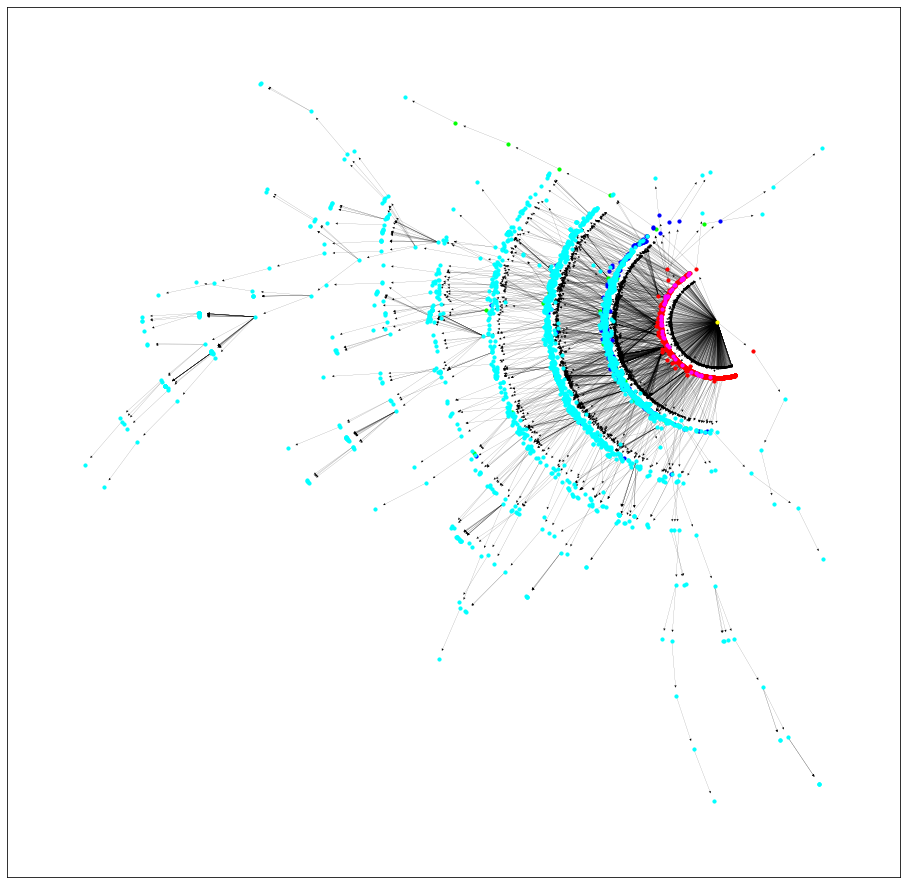

In [36]:
# Debug
graph = graphs[0]
plt.figure(figsize=(16, 16))
view_graph(graph)

In [33]:
help(nx.draw_networkx_nodes)

Help on function draw_networkx_nodes in module networkx.drawing.nx_pylab:

draw_networkx_nodes(G, pos, nodelist=None, node_size=300, node_color='#1f78b4', node_shape='o', alpha=None, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, edgecolors=None, label=None, **kwds)
    Draw the nodes of the graph G.
    
    This draws only the nodes of the graph G.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary
       A dictionary with nodes as keys and positions as values.
       Positions should be sequences of length 2.
    
    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.
    
    nodelist : list, optional
       Draw only specified nodes (default G.nodes())
    
    node_size : scalar or array
       Size of nodes (default=300).  If an array is specified it must be the
       same length as nodelist.
    
    node_color : color or array of colors (default='#1f78b4')
       Node color.

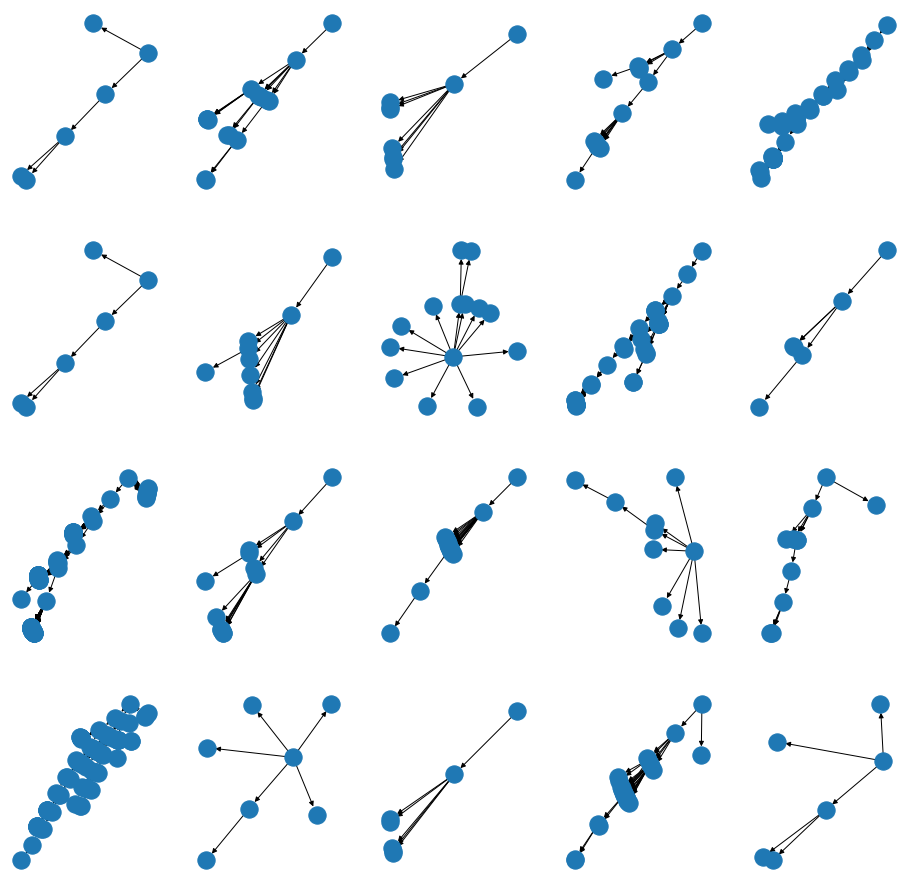

In [42]:
display_graphs(graphs[:20], 5)

In [60]:
g = graphs[0].to_networkx(node_attrs=['type'])

In [67]:
g.nodes().data()

NodeDataView({0: {'type': tensor(0)}, 1: {'type': tensor(0)}, 2: {'type': tensor(0)}, 3: {'type': tensor(0)}, 4: {'type': tensor(0)}, 5: {'type': tensor(0)}})

In [70]:
[
    n for n in g.nodes()
    if g.nodes().data()[n]['type'] == 0
]

[0, 1, 2, 3, 4, 5]

In [77]:
g.edges

OutEdgeView([(0, 1), (0, 2), (2, 3), (3, 4), (3, 5)])